In [233]:
import numpy as np
import pandas as pd
import sympy
from random import randint
import matplotlib.pyplot as plt

In [234]:
class HashSearch():

    def __init__(self):
        """
        hash_len - предоставляет информацию о длине итоговой хэш таблицы
        hash_table - результат хэш поиска в виде таблицы
        hash_array - в этом массиве хранится информация не прошедшая избавления от коллизии
        self.count_of_iterations_to_solve_collision - кол-во итераций для решения коллизии для поиска числа
        self.success_of_finding_number - удача поиска числа
        """
        self.hash_len = None
        self.hash_table = None
        self.hash_array = None
        self.count_of_iterations_to_solve_collision = 0
        self.success_of_finding_number = False
        pass

    def create_hash(self, array_of_numbers, prefered_hash_len=None):
        """
        Эта функция позволяет из массива данных создать хэш таблицу
        array_of_numbers - массив с числами
        prefered_hash_len - предпочтительная длина хэш таблицы, может быть изменена программой
                            в зависимости от минимально возможного размера таблицы
        """
        self.__init__()
        # Задаёт длину нашей будущей хэш таблицы, если нет предпочтительного значения для длины хэша,
        # То выставляем ближайшее простое число для адресного пространства хэша
        if (prefered_hash_len == None):
            if (sympy.isprime(len(array_of_numbers))):
                self.hash_len = len(array_of_numbers)
            else:
                self.hash_len = sympy.nextprime(len(array_of_numbers))
        elif (len(array_of_numbers) > prefered_hash_len):
            if (sympy.isprime(len(array_of_numbers))):
                self.hash_len = len(array_of_numbers)
            else:
                self.hash_len = sympy.nextprime(len(array_of_numbers))
        else:
            self.hash_len = prefered_hash_len

        # Инициализируем будущую хэш таблицу
        self.hash_table = pd.DataFrame(index=list(range(0, self.hash_len)), columns=["Ключ"])

        # Создаём массив, в котором хранится информация не прошедшая проверку на коллизию
        self.__initialize_hash_array(array_of_numbers)

        # А далее мы проведём решение коллизии и запишем итоговый результат в таблицу
        self.__resolution_of_collision()
        pass

    def find_number_in_hash(self, number_to_find):
        """
        Эта функция позволяет найти число или попытаться это сделать (в зависимости от хэша)
        В результате мы получим кол-во итераций на выполнение этого и успех действия
        number_to_find - число которое мы будем искать
        """
        self.success_of_finding_number = False
        # Находим индекс расположения элемента
        place_index_for_nuber = abs(number_to_find) % self.hash_len
        # создаём представление в виде массива (с ним удобнее работать при добавлении в хэш)
        array = list()
        [array.append([]) for _ in range(self.hash_len)]
        array[place_index_for_nuber].extend([number_to_find])
        self.hash_array = array
        # Если индекс в хэше свободен, то сразу записываем туда информацию
        if (self.hash_table.iloc[place_index_for_nuber, 0] != number_to_find):
            self.__resolution_of_collision_for_existing_has_to_find_number()
        # Иначе производим избавление от коллизии
        else:
            self.count_of_iterations_to_solve_collision = 0
            self.success_of_finding_number = True
        pass

    def __initialize_hash_array(self, array_of_numbers):
        """
        Функция преобразует из массива чисел массив с информацией, которая
        будет очищена от коллизии
        array_of_numbers - массив с числами
        """
        # Создаём двумерный массив
        array = list()
        [array.append([]) for _ in range(self.hash_len)]

        # После чего в зависимости от индекса массива добавляем туда информацию
        for num in array_of_numbers:
            index = abs(num) % self.hash_len
            array[index].extend([num])

        self.hash_array = array
        pass

    def __resolution_of_collision(self):
        """
        Эта функция позволяет избавиться от коллизии в self.hash_array
        По сути сделает из зубчатого массива обычную матрицу
        """
        # Проходимся по всему массиву и смотрим, есть ли там нужное нам число
        for i in range(len(self.hash_array)):
            # Если есть то забираем из массива это число
            while (len(self.hash_array[i]) > 1):
                num = self.hash_array[i].pop(-1)
                # После чего ищем для него свободное место
                # Сначала проходимся с индекса поиска по конец хэша
                for j in range(i, len(self.hash_array)):
                    if (self.hash_array[j] == []):
                        self.hash_array[j].extend([num])
                        num = None
                        break
                # А уже потом, если мы не нашли свободное место, то
                # До индекса предсшествующему начальньного индекса
                if (num != None):
                    for j in range(0, i):
                        if (self.hash_array[j] == []):
                            self.hash_array[j].extend([num])
                            num = None
                            break

        # После чего избавляемся от массивов в массиве
        # Переделывая их в другие типы данных
        for i in range(len(self.hash_array)):
            if (len(self.hash_array[i]) > 0):
                self.hash_array[i] = int(self.hash_array[i][0])
            else:
                self.hash_array[i] = ""

        # А после записываем туда информацию
        self.hash_table["Ключ"] = self.hash_array
        pass

    def __resolution_of_collision_for_existing_has_to_find_number(self):
        """
        Здесь мы решаем коллизию при добавлении нового числа (число представленное в виде массива) в хэш таблицу
        """
        # Счётчик итераций
        self.count_of_iterations_to_solve_collision = 0
        # Проходимся по всем элементам массива
        for i in range(len(self.hash_array)):
            # И пока мы не избавимся от всех элементов в этом массиве
            while (len(self.hash_array[i]) >= 1):
                # То вынимаем его от туда
                num = self.hash_array[i].pop(-1)
                # После чего ищем такое число, которое будет с ним совпадать
                # Сначала проходимся с индекса поиска по конец хэша
                for j in range(i, len(self.hash_table["Ключ"])):
                    self.count_of_iterations_to_solve_collision += 1
                    # Если находим такое число, то наша задача решена
                    if (self.hash_table.iloc[j, 0] == num):
                        num = None
                        self.success_of_finding_number = True
                        break
                # А уже потом, если мы не нашли рультат, то проходимя от начала хэша 
                # До индекса предсшествующему начальньного индекса
                if (num != None):
                    for j in range(0, i):
                        self.count_of_iterations_to_solve_collision += 1
                        # Если находим такое число, то наша задача решена
                        if (self.hash_table.iloc[j, 0] == num):
                            num = None
                            self.success_of_finding_number = True
                            break
        pass


HS = HashSearch()

In [235]:
def create_visualisation_of_experement(HS, hash_len, sd=4):
    """
    Это функция для проведения исследования и визуализации информации
    hash_len - массив с длиннами хэш таблиц
    sd - стандатное откланение для генерации чисел по формуле нормального распределния
    """
    # Объявляем массивы для кол-ва итераций и успешности нашего хэщ-поиска
    array_of_iterations = list()
    array_of_successes = list()

    # Далее проходимся по массиву длин нашего хэша
    for i in hash_len:
        # После чего случайно генерируем его и производи в нём поиск числа
        HS.create_hash(list(np.random.normal(0, sd, size=i).astype(int)))
        HS.find_number_in_hash(int(np.random.normal(0, sd)))

        # После чего записываем результаты в массивы
        array_of_iterations.extend([HS.count_of_iterations_to_solve_collision])
        array_of_successes.extend([HS.success_of_finding_number])

    # По уже созданным массивам создаём таблицу с результатми наших вычислений
    # Таблица будет состоять из столбцов кол-ва итераций и их успешности
    sr_for_iterations = pd.Series(data=array_of_iterations, index=hash_len)
    sr_for_successes = pd.Series(data=array_of_successes, index=hash_len)
    df_result = pd.DataFrame({"Кол-во итераций": sr_for_iterations, "Успех операции": sr_for_successes})
    
    # Производим вывод кол-ва неудачных поисков
    print(f"Кол-во неудач поиска значения значений в хэш: {df_result.loc[df_result['Успех операции'] == False].count()[0]}")
    # Распечатываем участи таблицы, где у нас произошёл успешный поиск и кол-во затраченных итераций > 0
    print(df_result.loc[df_result['Успех операции'] == True].loc[df_result['Кол-во итераций'] > 0])
    
    # Визуализируем информацию
    with plt.style.context('seaborn'):
            fig = plt.figure(figsize=(22,13))
            ax = fig.add_subplot()
            
            ax.plot(df_result["Кол-во итераций"], marker="H", markersize=4,
                    label="Кол-во итераций для разрешения коллизии")
            ax.scatter(x=df_result.loc[df_result["Успех операции"] == False].index.values, 
                       y=df_result["Кол-во итераций"].loc[df_result["Успех операции"] == False],
                       color="r", label="Неуспех поиска нового числа")
            
            ax.tick_params(axis='both', labelsize=12)
            plt.legend(fontsize=24)
            plt.show()

In [236]:
HS.create_hash([1, 2, 3, 4, 5])
HS.hash_table

,Ключ
0,5
1,1
2,2
3,3
4,4


In [237]:
HS.create_hash([3, 4, 8, 10])
HS.hash_table

,Ключ
0,10
1,8
2,
3,3
4,4


In [238]:
HS.create_hash([0, 4, 8, 10])
HS.hash_table

,Ключ
0,0
1,10
2,
3,8
4,4


In [239]:
HS.create_hash([9, 9, 9, 9])
HS.hash_table

,Ключ
0,9
1,9
2,9
3,
4,9


In [240]:
HS.create_hash([0, 4, 8, 10, 2, 5, 100, 5], 10)
HS.hash_table

,Ключ
0,0
1,100
2,2
3,10
4,4
5,5
6,5
7,
8,8
9,


In [241]:
HS.create_hash([0, 4, 8, 10, 2, 5, 100, 5], 3)
HS.hash_table

,Ключ
0,0
1,100
2,2
3,
4,4
5,5
6,5
7,
8,8
9,


In [242]:
HS.create_hash(list(np.random.randint(6, size=20)), 25)
HS.hash_table

,Ключ
0,
1,1
2,2
3,3
4,4
5,5
6,1
7,1
8,1
9,1


In [243]:
HS.create_hash([3, 4, 8, 10], 4)
print(HS.hash_table, end='\n\n')
HS.find_number_in_hash(8)
print(HS.count_of_iterations_to_solve_collision, HS.success_of_finding_number)

   Ключ
0     4
1     8
2    10
3     3

2 True


Кол-во неудач поиска значения значений в хэш: 10
    Кол-во итераций  Успех операции
11                3            True
17                8            True
31               16            True
37               23            True
53               20            True
83               52            True
89               67            True
97               44            True


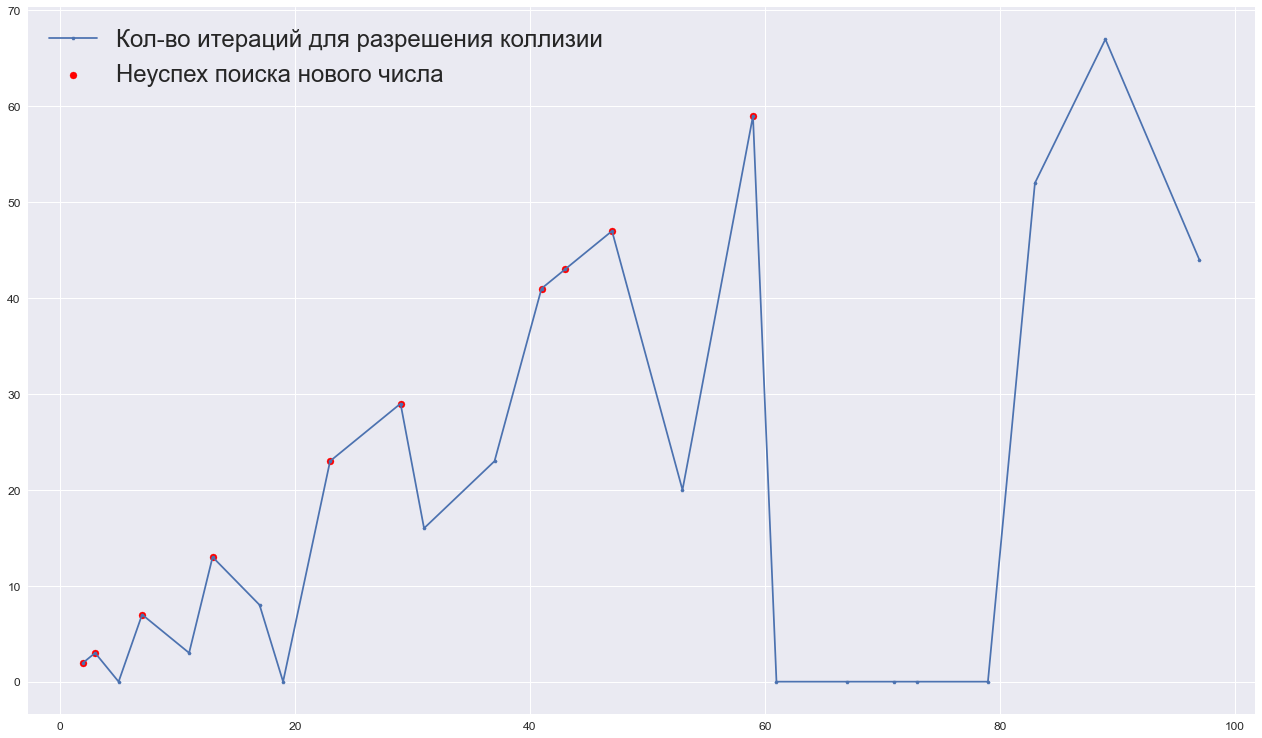

In [244]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 100)), sd=7)

Кол-во неудач поиска значения значений в хэш: 4
    Кол-во итераций  Успех операции
3                 2            True
29               14            True
67               58            True
71               36            True
89               51            True
97               38            True


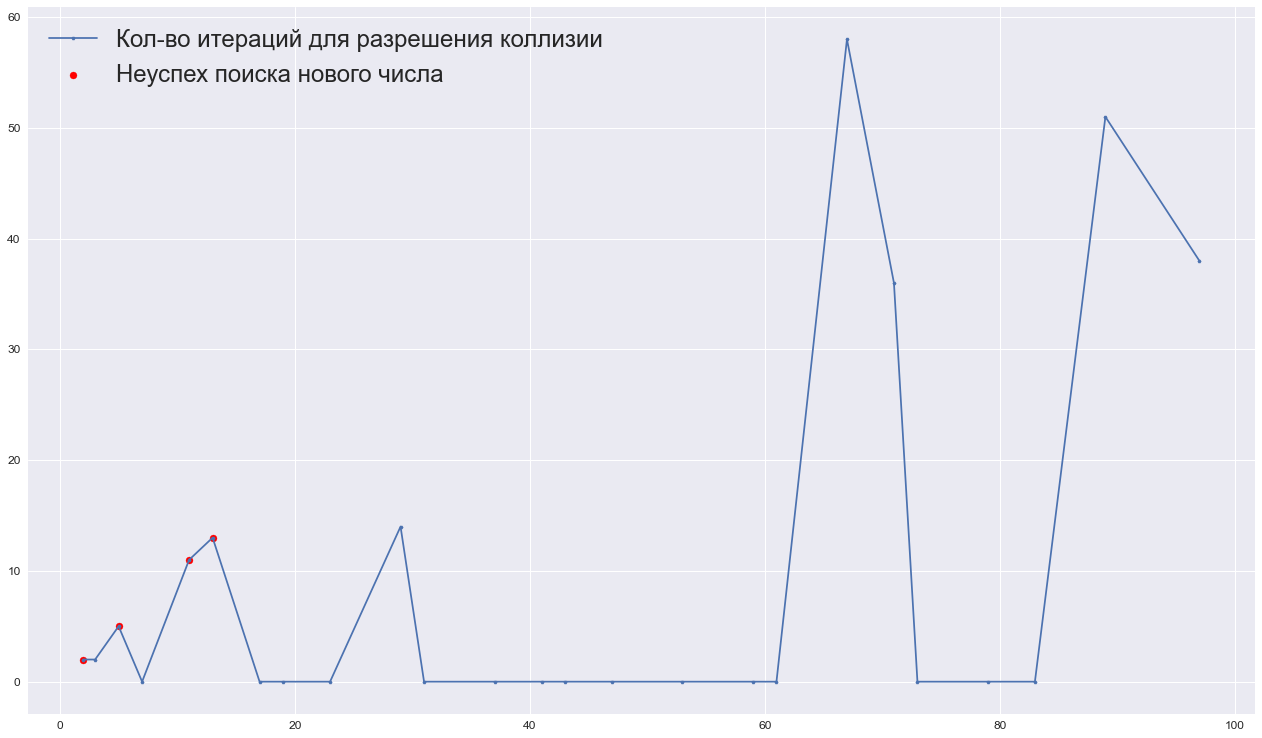

In [245]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 100)))

Кол-во неудач поиска значения значений в хэш: 13
    Кол-во итераций  Успех операции
31               16            True
53               31            True
61               39            True
73               50            True
83               58            True
97               43            True


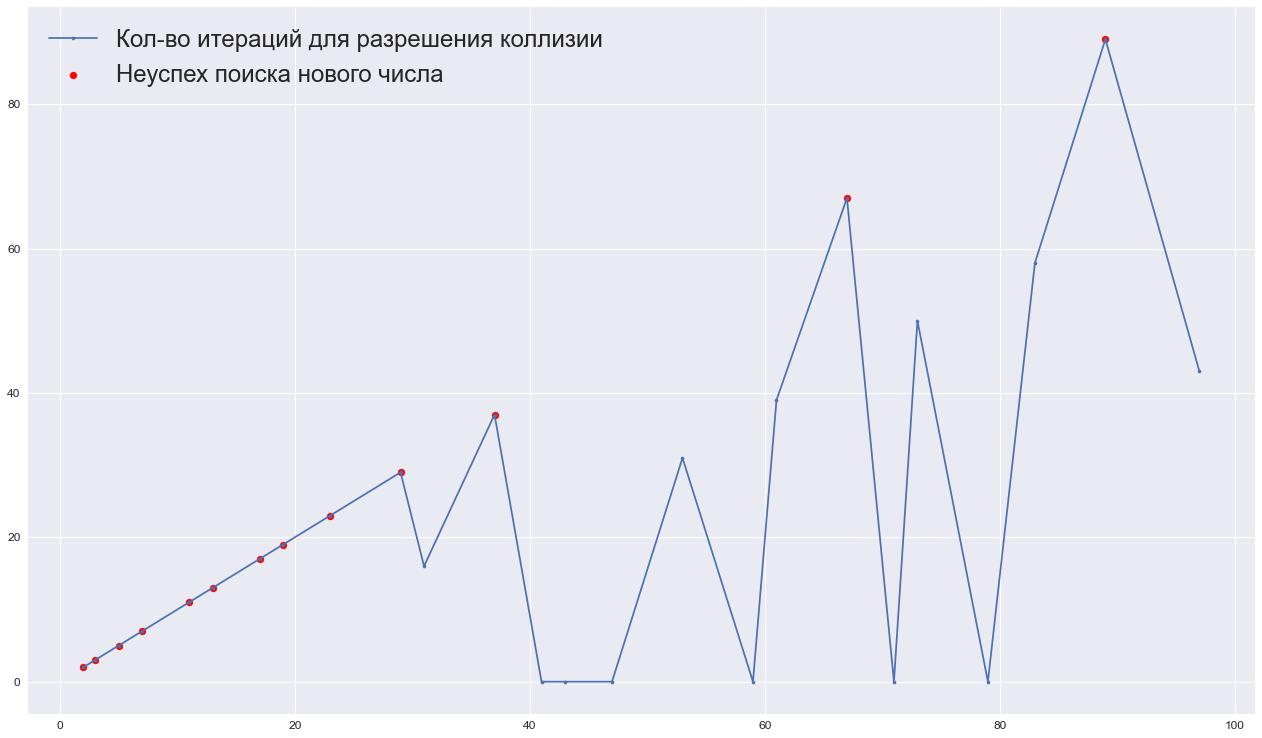

In [246]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 100)), sd=10)

Кол-во неудач поиска значения значений в хэш: 9
     Кол-во итераций  Успех операции
3                  3            True
29                12            True
47                35            True
59                28            True
97                52            True
..               ...             ...
953              563            True
971              596            True
977              537            True
983              668            True
997              154            True

[66 rows x 2 columns]


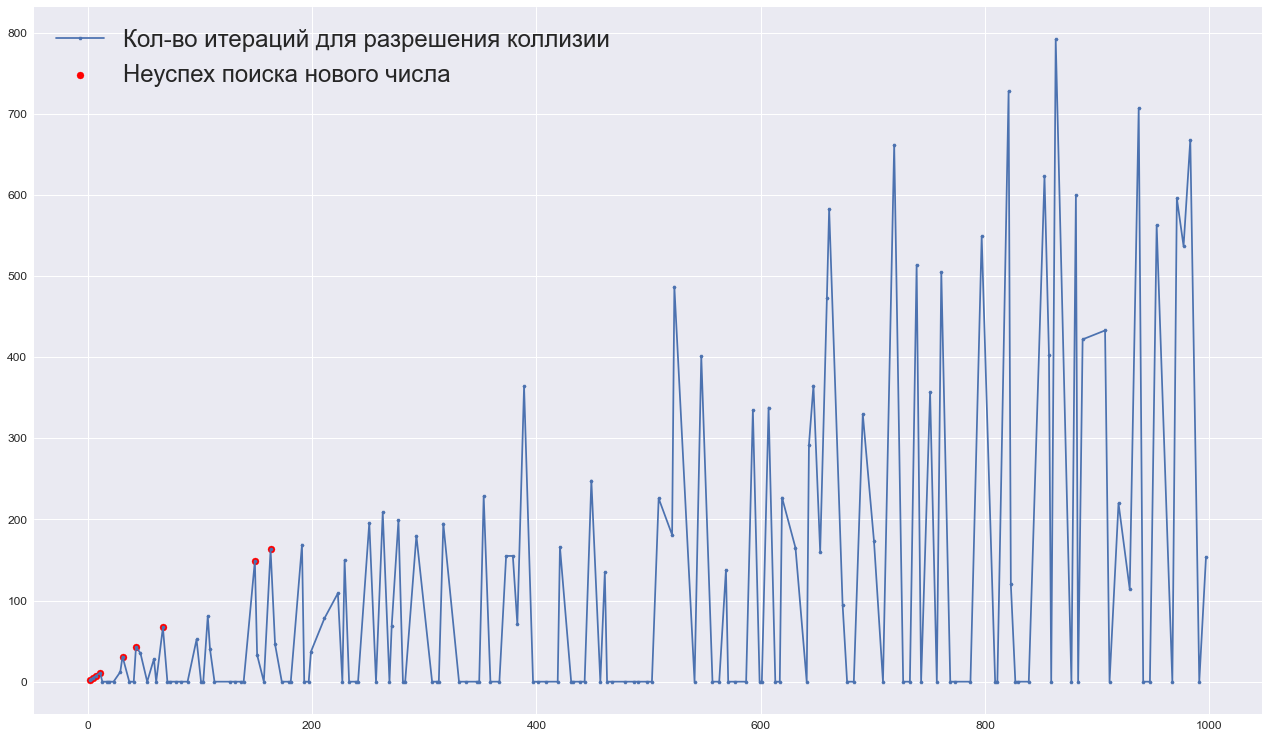

In [247]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 1000)), sd=7)

Кол-во неудач поиска значения значений в хэш: 2
      Кол-во итераций  Успех операции
239               236            True
251               241            True
499               476            True
1069             1020            True
1087             1057            True
1747             1675            True


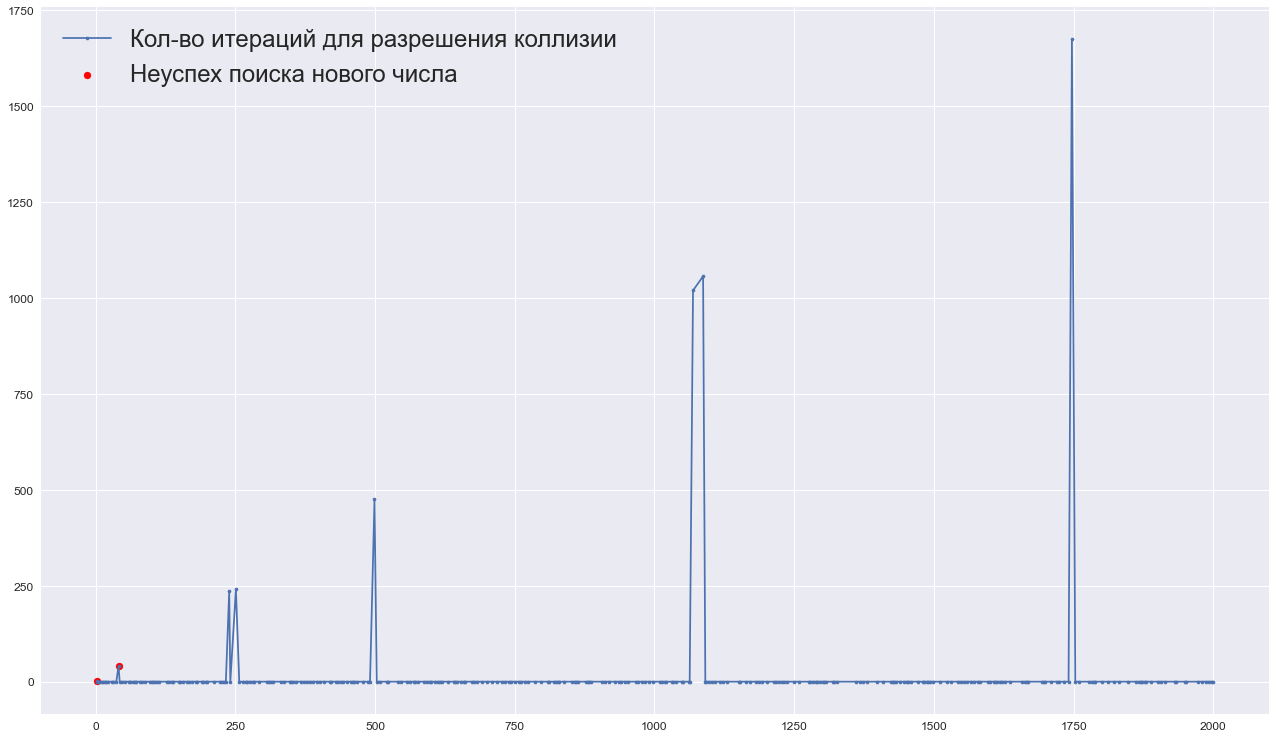

In [248]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=0.5)

Кол-во неудач поиска значения значений в хэш: 4
      Кол-во итераций  Успех операции
19                  8            True
29                 21            True
41                 31            True
59                 28            True
67                 26            True
...               ...             ...
1787             1724            True
1801              689            True
1949             1330            True
1973              775            True
1993             1730            True

[87 rows x 2 columns]


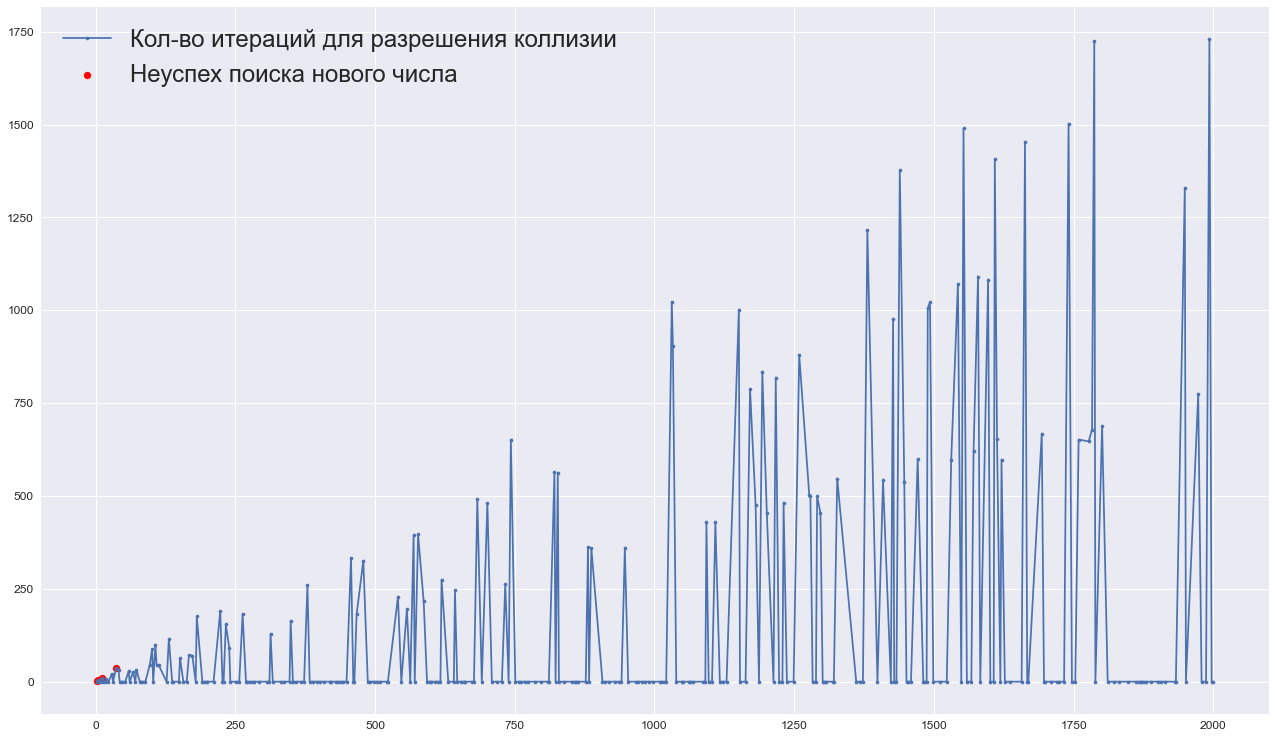

In [252]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=2)

Кол-во неудач поиска значения значений в хэш: 8
      Кол-во итераций  Успех операции
23                 11            True
37                 25            True
67                 54            True
89                 27            True
97                 83            True
...               ...             ...
1933             1085            True
1949             1569            True
1951              392            True
1973             1348            True
1999              773            True

[122 rows x 2 columns]


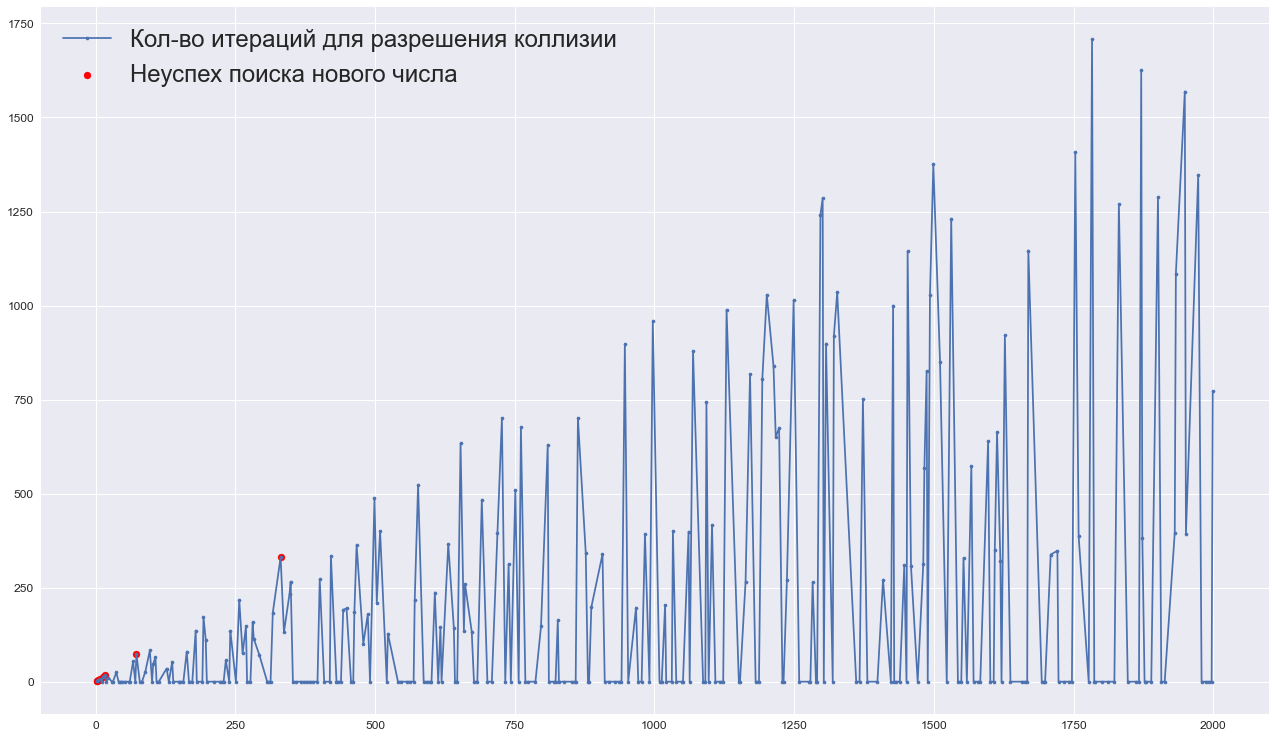

In [253]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=4)

Кол-во неудач поиска значения значений в хэш: 10
      Кол-во итераций  Успех операции
41                 19            True
61                 17            True
67                 35            True
79                 33            True
97                 35            True
...               ...             ...
1949              847            True
1951             1194            True
1979              661            True
1987             1491            True
1997              488            True

[120 rows x 2 columns]


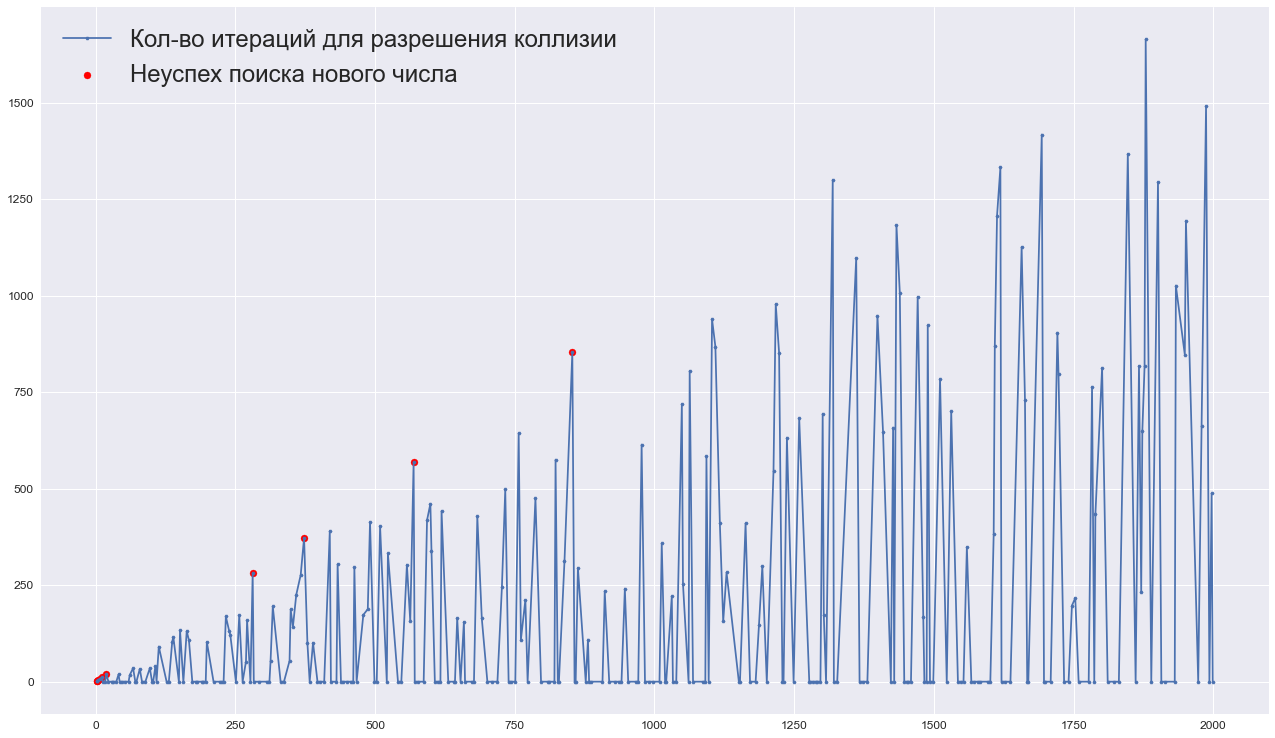

In [249]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=7)

Кол-во неудач поиска значения значений в хэш: 20
      Кол-во итераций  Успех операции
31                 15            True
83                 59            True
107                71            True
127                76            True
131                42            True
...               ...             ...
1973             1921            True
1979             1806            True
1993             1819            True
1997             1437            True
1999             1282            True

[136 rows x 2 columns]


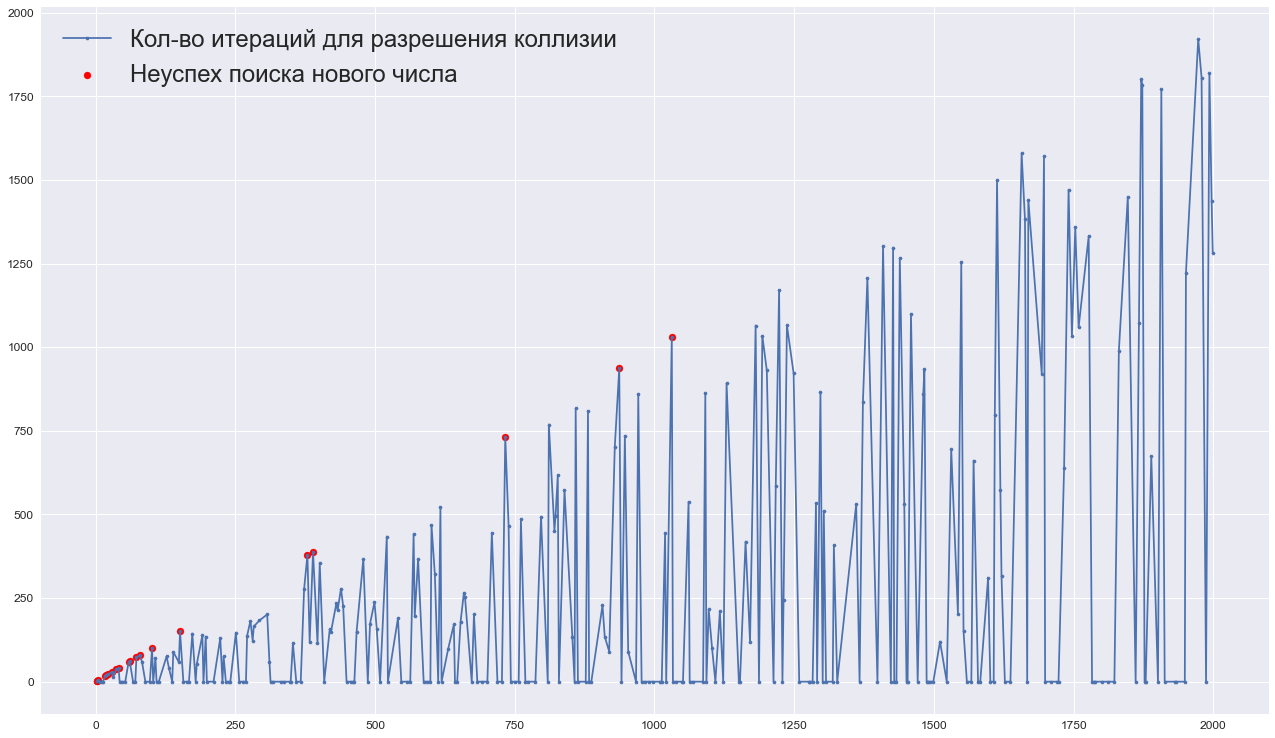

In [250]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=14)

Кол-во неудач поиска значения значений в хэш: 46
      Кол-во итераций  Успех операции
113                 5            True
137                82            True
167                61            True
173               108            True
181                42            True
...               ...             ...
1913              361            True
1931              203            True
1951              174            True
1973              336            True
1979              941            True

[120 rows x 2 columns]


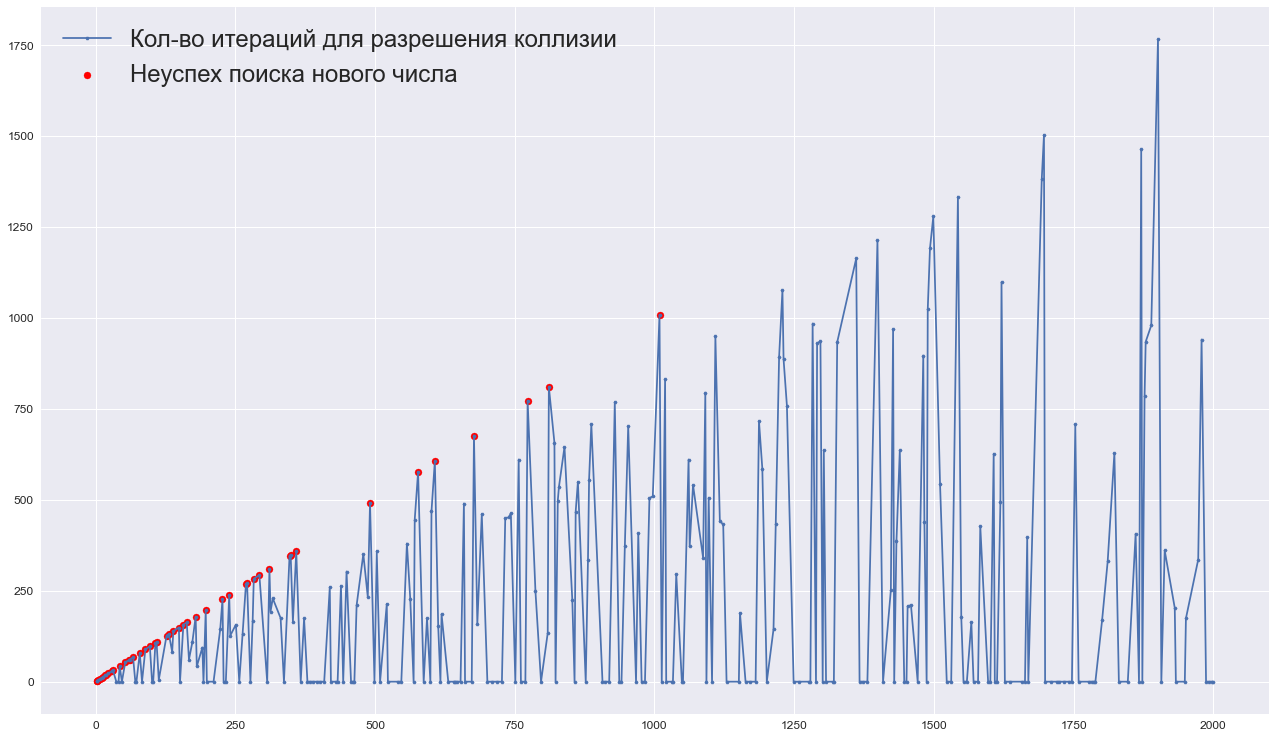

In [251]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=50)

Кол-во неудач поиска значения значений в хэш: 198
      Кол-во итераций  Успех операции
173                23            True
313                66            True
359                72            True
409                 3            True
643               122            True
853                71            True
857               206            True
859               285            True
881               358            True
947               311            True
997               466            True
1019              329            True
1063              403            True
1069              494            True
1087              492            True
1181              404            True
1187              589            True
1237              626            True
1283              644            True
1291              355            True
1301              695            True
1367              131            True
1399               22            True
1409              272            True


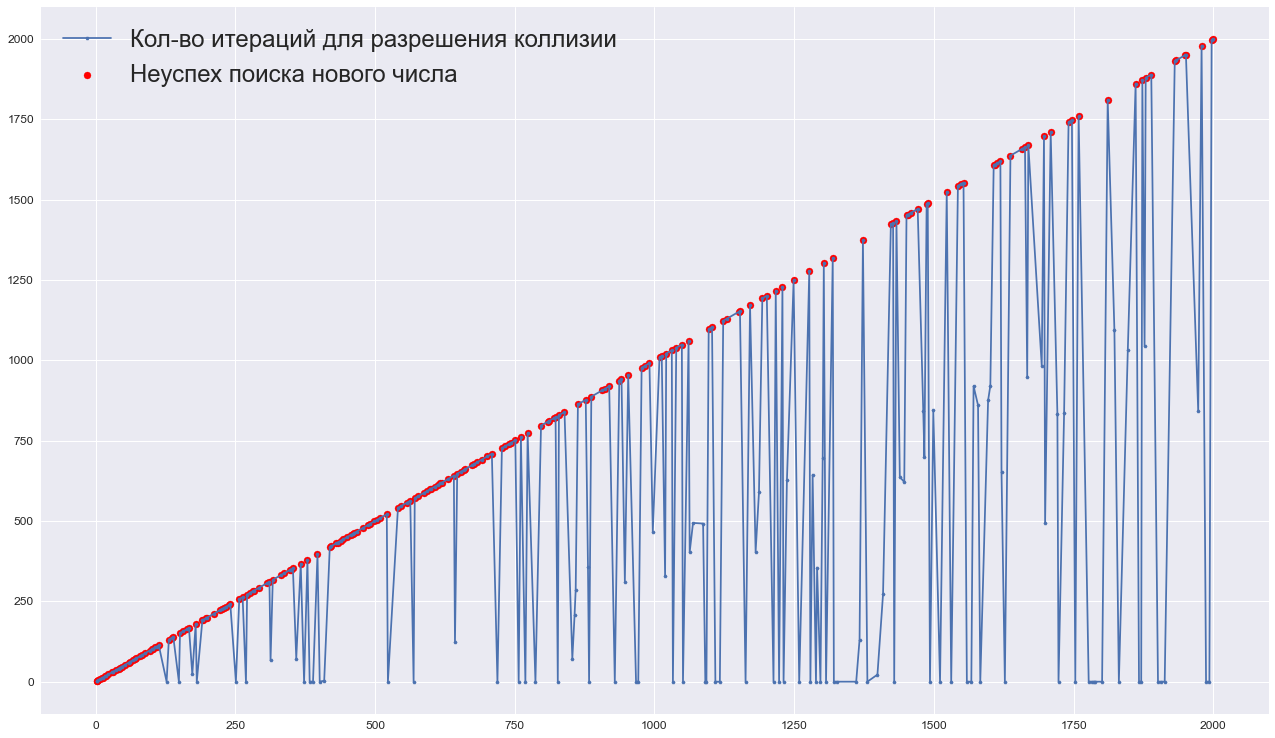

In [254]:
create_visualisation_of_experement(HS, list(sympy.primerange(0, 2000)), sd=500)